# NTSB Investigations of Aircraft Incursions in the USA

### By Jesse Allard
#### CMSC 320 Fall 2020 Final Project
#### Professor Dickerson

## Introduction

Airplane accidents can be devastating.  A lot can go wrong in a very short amount of time.  What's more, airplanes are common all over the country, often flying over densely-populated areas.  The NTSB (National Transportation Safety Board) is a US government board that is required to investigate air disasters.  An Accident is an air disaster that is usually fatal, whereas an incursion is usually a non-fatal breach of protocol.  Since both events have serious consequences, the NTSB investigates both types of events.

Data from the NTSB is available for download publicly at:
https://catalog.data.gov/dataset/aviation-data-and-documentation-from-the-ntsb-accidentdatabase-system

This dataset contains information about all of the investigations that were conducted by the NTSB up to December of 2015.

The website above links to a large XML file (42.8 MB) that contains all NTSB investigation, the reason for the investigation, the time and location of the aircraft, the type of incident, whether it was fatal, etc.

The goal of this tutorial is to use this data with the data science pipeline.  This will allow us to visualize this data and possibly draw some interesting conclusions from it.

### Prerequisites

We will be using Jupyter Notebooks and Python version 3.  In addition to this, we will be using several modules of the Python Library including:
    Pandas,
    Numpy,
    xml.etree.ElementTree,
    Folium,
    Matplotlib,
    Seaborn,
    Datetime, 
    and Sklearn
  
Make sure you have these prerequisites installed on your computer.  Once that is done, open a Jupyter Notebook and download the XML dataset (linked above) to the same directory as your Jupyter Notebook.

## Step 1:Gathering the Data

We will be using the Pandas and the xml modules to gather the data:
The xml module is used to read data from the XML file that we downloaded
Then, we use Pandas to create a DataFrame object which allows us to view and access the data later without having to re-read the xml.

First, visit the page at:
https://catalog.data.gov/dataset/aviation-data-and-documentation-from-the-ntsb-accident-database-system

Download the data offered at that webpage.  It is available as an XML file.  Save that to a folder on your computer where your notebook is stored.  Then, run the following code to parse the XML into a tree and load the data into a Pandas dataframe.

In [99]:
import xml.etree.ElementTree as et
xtree = et.parse("AviationData.xml")


In [101]:

import pandas as pd
root = xtree.getroot()


rows = []
for child1 in root:
  for child in child1:
    rows.append(child.attrib)


rows
pd.set_option('display.max_columns', None)
aviation = pd.DataFrame(rows)

aviation.head(5)

,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,Latitude,Longitude,AirportCode,AirportName,InjurySeverity,AircraftDamage,AircraftCategory,RegistrationNumber,Make,Model,AmateurBuilt,NumberOfEngines,EngineType,FARDescription,Schedule,PurposeOfFlight,AirCarrier,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,BroadPhaseOfFlight,ReportStatus,PublicationDate
0,20080125X00106,Accident,SEA08CA056,12/31/2007,"Santa Ana, CA",United States,33.675556,-117.868056,SNA,John Wayne - Orange County,Non-Fatal,Substantial,Airplane,N2800D,Piper,PA-12,No,1,Reciprocating,Part 91: General Aviation,,Instructional,,,,,2,VMC,LANDING,Probable Cause,02/28/2008
1,20080206X00141,Accident,CHI08WA075,12/31/2007,"Guernsey, United Kingdom",United Kingdom,49.435000,-2.600278,,,Non-Fatal,Minor,,,Cessna,T303,No,,,,,Unknown,,,,,1,,,Foreign,02/06/2008
2,20080109X00032,Accident,NYC08FA071,12/30/2007,"Cherokee, AL",United States,34.688611,-87.920000,,,Fatal(3),Substantial,Helicopter,N109AE,BELL,206L-3,No,1,Turbo Shaft,Part 91: General Aviation,,Other Work Use,,3,0,0,0,VMC,MANEUVERING,Probable Cause,01/15/2009
3,20080114X00045,Accident,LAX08FA043,12/30/2007,"Paso Robles, CA",United States,35.542222,-120.522778,PRB,Paso Robles Airport,Fatal(1),Substantial,Airplane,N254SR,Cirrus Design Corp.,SR22,No,1,Reciprocating,Part 91: General Aviation,,Personal,,1,,,,VMC,MANEUVERING,Probable Cause,06/20/2014
4,20080129X00122,Accident,CHI08CA057,12/30/2007,"Alexandria, MN",United States,45.866111,-95.394444,AXN,Chandler Field Airport,Non-Fatal,Substantial,Airplane,N5093F,Lerohl,RV-8,Yes,1,Reciprocating,Part 91: General Aviation,,Personal,,,,,1,VMC,TAKEOFF,Probable Cause,02/28/2008


Great!  Now that we have the data in a Pandas DataFrame, let us visualize the data so we can understand what it means.
First, we can plot this as a map so we can see where in the USA these crashes originated.  Notice how some rows (in fact, a lot of rows) are missing a latitude and longitude above.  We will need to solve this using the geopy module which can convert the city nae into a latitude and longitude.  Below, we can see that several incursions ocurred at Teterboro, NJ, but only one of those records holds a latitude and longitude.  For our analysis, this is satisfactory as we will only need to plot any given city once on the map.  Therefore, we can safely fill in the empty latitude and longitude with np.NaN, which means not a number.

In [102]:
aviation[aviation['Location'] == 'Teterboro, NJ'].head(5)

,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,Latitude,Longitude,AirportCode,AirportName,InjurySeverity,AircraftDamage,AircraftCategory,RegistrationNumber,Make,Model,AmateurBuilt,NumberOfEngines,EngineType,FARDescription,Schedule,PurposeOfFlight,AirCarrier,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,BroadPhaseOfFlight,ReportStatus,PublicationDate
13,20080128X00107,Incident,OPS08IA004B,12/27/2007,"Teterboro, NJ",United States,,,,,Incident,,,,Raytheon Corporate Jets,H25B,No,,,,NSCH,,,,,,2,VMC,TAXI,Probable Cause,03/31/2008
14,20080128X00107,Incident,OPS08IA004A,12/27/2007,"Teterboro, NJ",United States,,,,,Incident,,,,Gulfstream American,G5,No,,,,,Unknown,,,,,2,VMC,TAKEOFF,Probable Cause,03/31/2008
451,20071011X01543,Accident,ATL07LA130,09/28/2007,"Teterboro, NJ",United States,40.850000,-74.061667,TEB,TETERBORO,Non-Fatal,Substantial,,N90TH,Dassault Aviation,Mystere Falcon 900,No,3,Turbo Fan,,,Executive/Corporate,,,,,7,VMC,TAXI,Probable Cause,07/30/2008
746,20070823X01229,Incident,OPS07IA008B,08/13/2007,"Teterboro, NJ",United States,,,KTEB,Teterboro,Incident,,,,Cessna,CL60,No,,,,,Personal,,,,,4,,LANDING,Probable Cause,11/30/2007
747,20070823X01229,Incident,OPS07IA008A,08/13/2007,"Teterboro, NJ",United States,,,KTEB,Teterboro,Incident,,,,Learjet,45,No,,,,,Personal,,,,,4,,LANDING,Probable Cause,11/30/2007


Next, we want to fill in any missing numerical values with np.NaN.  This will allow us to treat an entire column as a number value rather than an unknown-type object.  The following code will fill in empty locations with np.NaN.

NOTE: For our analysis, latitude and longitude may be np.NaN if the incident ocurred outside of the United States.  This is alright since we are only going to be looking at the crashes that ocurred over the United States (since we are using an NTSB dataset).  We do not care about missing data for incidents that ocurred outside the United States since we are not analyzing those incidents.

We can fill in the missing datqa for Injuries as np.NaN since missing data there means no injuries repoirted from the incursion.

In [103]:
import numpy as np
aviation['TotalFatalInjuries'] = aviation['TotalFatalInjuries'].replace('\s+',np.nan,regex=True).replace('',np.nan).astype(float)
aviation['TotalSeriousInjuries'] = aviation['TotalSeriousInjuries'].replace('\s+',np.nan,regex=True).replace('',np.nan).astype(float)
aviation['TotalMinorInjuries'] = aviation['TotalMinorInjuries'].replace('\s+',np.nan,regex=True).replace('',np.nan).astype(float)
aviation['TotalUninjured'] = aviation['TotalUninjured'].replace('\s+',np.nan,regex=True).replace('',np.nan).astype(float)
aviation['Latitude'] = aviation['Latitude'].replace('\s+',np.nan,regex=True).replace('',np.nan).astype(float)
aviation['Longitude'] = aviation['Longitude'].replace('\s+',np.nan,regex=True).replace('',np.nan).astype(float)
aviation['PublicationDate'] = aviation['PublicationDate'].replace('\s+',np.nan,regex=True).replace('',np.nan)


It is possible to fill in missing latitude and longitude data using only a city or providence name.  If you wish to know more about this process, I will direct you to the Geopy package for Python.  This package allows us to look up the recorded latitude and longitude (and other information too) from a city or providence name.  While this is not necesary for our analysis, you may find it worthwhile to use in the future.  Here is information about the Geopy package:
https://pypi.org/project/geopy/

Congratulations, you have completed the data collection process!  The next step will be to visualize the data:

## Step 2: Visualizing the Data

Now that we have the data in our aviation dataframe, we can start to visualize the data.  First, let us add a column for the Month and the Year of each incursion.  In doing so, we will be parsing the date of the incursion as a Datetime object.

In [104]:
# Convert date to datetime
aviation['EventDatetime'] = pd.to_datetime(aviation['EventDate'], format="%m/%d/%Y")
aviation['PublicationDatetime'] = pd.to_datetime(aviation['PublicationDate'], format="%m/%d/%Y")
aviation['Year'] = pd.DatetimeIndex(aviation['EventDatetime']).year 
aviation['Month'] = pd.DatetimeIndex(aviation['EventDatetime']).month

We will start by plotting a bar graph of the number of incursions per year.

<AxesSubplot:>

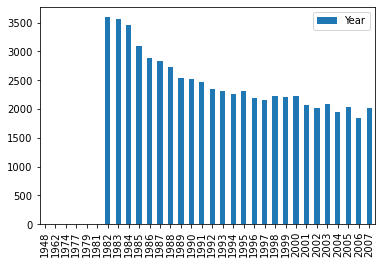

In [105]:
# Number of crashes per year

import matplotlib.pyplot as plt
%matplotlib inline
spelled_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
years = aviation['Year'].value_counts().sort_index()
#months.plot.bar( x='spelled_month')
years = years.to_frame()
years.plot.bar( )

We can observe that the number of incursions in recent years islower than that of earlier years.  We may think of this as our modern airways being safer.  However, keep in mind that the NTSB is a governmnet agency.  Therefore, it can take a long time before they actually get around to publishing their finalized ruling about an investigation.  Hence, there may be (and probably are) a lot of incursions that have not yet been published in recent years due to backlogs ands/or pending investigations.

Now, we will look at the number of incursions that happen per month.  To do this, we will look at all years together and see how many incursions have ever ocurred in the month of Janyary, Febryary, etc. individually.

<AxesSubplot:xlabel='Spelled_Month'>

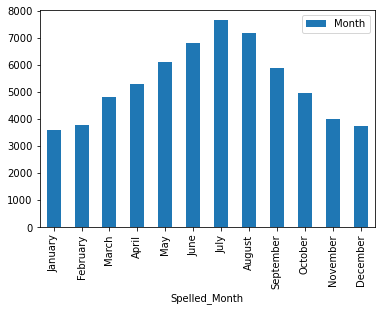

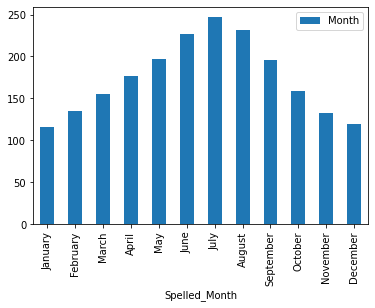

In [107]:
# Number of crashes per month
import matplotlib.pyplot as plt
%matplotlib inline
spelled_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

months = aviation['Month'].value_counts().sort_index()
#months.plot.bar( x='spelled_month')
months = months.to_frame()
months['Spelled_Month'] = spelled_months
months
months.plot.bar( x='Spelled_Month')
days_per_month = [31,28,31,30,31,30,31,31,30,31,30,31]
for row_index, row in months.iterrows():
    months.at[row_index, "Month"] = (months.at[row_index, "Month"] / days_per_month[row_index-1])
months.plot.bar( x='Spelled_Month')

These graphs show the number of incidents that occurred in each month (aggreagating all years together). The first graph shows the number of incidents per month, while the second graph shows the number of incidents normalized to the number of days in each month (ignoring the extra day in a leap year).

From this graph, we can clearly see that the month of July contains more accidents than any other month.  In fact, the graph appears to show that the frequency of accidents is highest in the summertime (with the highest rate of incidents in July), and lower in th winter months (with the lowest rate of incidents in January or December.

We could speculate that these results might be from an increased number of flights in the summer months.  It could also be from an increase in the amount of incliment weather in the summer months; an increase in pilot distraction in summer months; an increase in mechanical failures in warmer weather; a decrease in saety precautions in warmer months.  

In case you were wondering, here is what our aviation dataframe looks like right now.  We just finished creating bar graphs using the newly-added "Month" and "Year" columns on the dataframe:

In [109]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(aviation.head(5))

,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,Latitude,Longitude,AirportCode,AirportName,InjurySeverity,AircraftDamage,AircraftCategory,RegistrationNumber,Make,Model,AmateurBuilt,NumberOfEngines,EngineType,FARDescription,Schedule,PurposeOfFlight,AirCarrier,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,BroadPhaseOfFlight,ReportStatus,PublicationDate,EventDatetime,PublicationDatetime,Year,Month
0,20080125X00106,Accident,SEA08CA056,12/31/2007,"Santa Ana, CA",United States,33.675556,-117.868056,SNA,John Wayne - Orange County,Non-Fatal,Substantial,Airplane,N2800D,Piper,PA-12,No,1,Reciprocating,Part 91: General Aviation,,Instructional,,NaN,NaN,NaN,2.0,VMC,LANDING,Probable Cause,02/28/2008,2007-12-31,2008-02-28,2007,12
1,20080206X00141,Accident,CHI08WA075,12/31/2007,"Guernsey, United Kingdom",United Kingdom,49.435000,-2.600278,,,Non-Fatal,Minor,,,Cessna,T303,No,,,,,Unknown,,NaN,NaN,NaN,1.0,,,Foreign,02/06/2008,2007-12-31,2008-02-06,2007,12
2,20080109X00032,Accident,NYC08FA071,12/30/2007,"Cherokee, AL",United States,34.688611,-87.920000,,,Fatal(3),Substantial,Helicopter,N109AE,BELL,206L-3,No,1,Turbo Shaft,Part 91: General Aviation,,Other Work Use,,3.0,0.0,0.0,0.0,VMC,MANEUVERING,Probable Cause,01/15/2009,2007-12-30,2009-01-15,2007,12
3,20080114X00045,Accident,LAX08FA043,12/30/2007,"Paso Robles, CA",United States,35.542222,-120.522778,PRB,Paso Robles Airport,Fatal(1),Substantial,Airplane,N254SR,Cirrus Design Corp.,SR22,No,1,Reciprocating,Part 91: General Aviation,,Personal,,1.0,NaN,NaN,NaN,VMC,MANEUVERING,Probable Cause,06/20/2014,2007-12-30,2014-06-20,2007,12
4,20080129X00122,Accident,CHI08CA057,12/30/2007,"Alexandria, MN",United States,45.866111,-95.394444,AXN,Chandler Field Airport,Non-Fatal,Substantial,Airplane,N5093F,Lerohl,RV-8,Yes,1,Reciprocating,Part 91: General Aviation,,Personal,,NaN,NaN,NaN,1.0,VMC,TAKEOFF,Probable Cause,02/28/2008,2007-12-30,2008-02-28,2007,12


Now, we will look at the most common brand names in this dataset of incursions.  First, we must convert the brand names to lower case.  Then, we can count the number of each value (i.e. number of each Make) to see which are the most common in the dataset.

In [112]:
# Convert the Brand Names to alll lowecase
aviation['MakeLower'] = aviation['Make'].str.lower()
aviation['MakeLower'].value_counts().head(8)

cessna      21214
piper       11425
beech        4103
bell         2043
boeing       1488
grumman      1064
mooney       1033
bellanca      870
Name: MakeLower, dtype: int64

Here, we can see the top 8 Makes of aircraft in the NTSB dataset.  Let us visualize the number of fatalities by aircraft as a violin plot for these 8 most common makes.  We will be using Seaborn, which is an excellent module that allows us to create visualizations.  If you want to know more about Seaborn, I will direct you to:
https://seaborn.pydata.org/

<AxesSubplot:xlabel='MakeLower', ylabel='TotalFatalInjuries'>

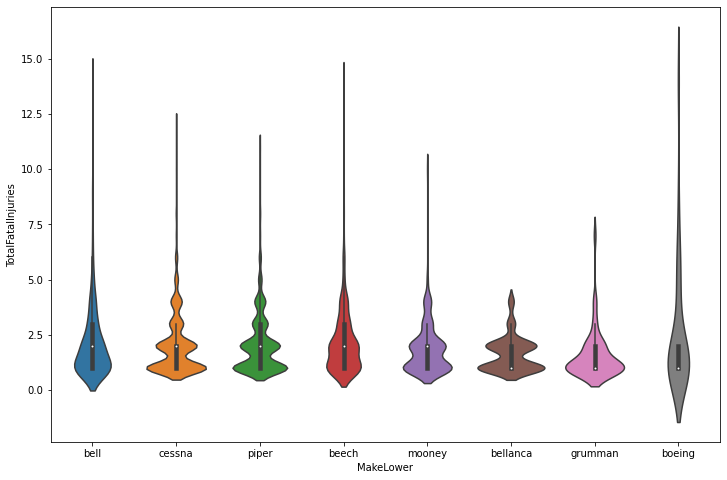

In [115]:
# Violin Plot of the most common brands
#aviation[aviation['Make']=="Boeing"]

import seaborn as sns
violin = aviation[((~(np.isnan(aviation['TotalFatalInjuries'])))
                  & (((aviation['TotalFatalInjuries']) > 0))
                  & (((aviation['TotalFatalInjuries']) < 15))
                  & ( ( aviation['MakeLower'] == 'cessna')
                     |( aviation['MakeLower'] == 'piper')
                     | ( aviation['MakeLower'] == 'beech')
                     |( aviation['MakeLower'] == 'bell')
                     |( aviation['MakeLower'] == 'boeing')
                     | ( aviation['MakeLower'] == 'grumman')
                     |( aviation['MakeLower'] == 'mooney')
                     |( aviation['MakeLower'] == 'bellanca')
                    )                                            )]

# Make the plot larger
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(12, 8)

sns.violinplot(x='MakeLower', y='TotalFatalInjuries', data=violin)

In the violin plot above, we are looking at the 8 most common aircraft that are involved in incursions.  To simplify the visualization, we are only looking at the incursions that had beetween 1 and 14 fatalities (inclusive).  We can observe that the majority of these accidents were around 1 fatality.  Especially with the Bellanca and Grumman aircrafts, the number of fatalities is consistently low (and never above 5 and 8 respectively).  On the other hand, the Boeing, Beech, and Bell fatalities extend above 14, as we can see a tail at the top of those plots.

We can attribute this to the size and/or type of the aircraft.  I know that Boeing aircraft compose the majority of commercial flights in the US, sothey have a lot of sould onboard.  Hence, it makes sense that most of those accidents involve a large number of fatalities.  I can infer that Bellanca and Grumman aircraft probably do not host more than 8 souls on a flight since those plots do not seem to ever have more than 8 fatalities.

Now, we will be using Folium to create a HeatMap of all incursions in the dataset.  Keep in mind that we are only plotting the latitude and longiutude of a city once (as we discovered earlier in the tutorial).

More information about Folium can be found at:
https://python-visualization.github.io/folium/

We will add each incursion location to our map as a red circle of radius 1.  The map is set to look at the United States.  We should only pay attention to the points above (and directly surrounding) the United States.  The location data for other countries is not consistent in the dataset since the NTSB only investigates flights to/from the USA.  Therefore, we only look at the map of USA.

In [117]:
import folium
map_osm = folium.Map(location=[39.29, -76.61], zoom_start=3)

#               RED      Orange   Yellow      Gray      Black
my_colors = ["#ff0000","#ffb300","#fff200","#a19f82","#0a0a0a"]

# Iterate over the crashes that have a recorded latitude and longitude
for row_index, row in aviation[(~(np.isnan(aviation["Latitude"].astype(float)))) 
                               & (~(np.isnan(aviation["Longitude"].astype(float)))) 
                          & ((~(aviation["TotalFatalInjuries"] == 0 )) & (~(np.isnan(aviation["TotalFatalInjuries"].astype(float)))))].iterrows():
  color = my_colors[0]
  folium.CircleMarker(
            location=[row["Latitude"], row["Longitude"]],
            radius=1,
            color=color,
            fill=False).add_to(map_osm)

In [118]:
map_osm

The map above shows only the fatal incidents and the location where they occurred.  Note that our dataset comes from the NTSB, so it only contains data about flights departing from and/or arriving in the USA.  Therefore, we cannot make concluions about other countries based on the data.

We can see that more populated regions in the USA seem to have a higher concentration of fatal incidents than regions o lower population.

By the way, an interesting point in the NTSB data is the amount of damage sustained by the aircraft.  Below, we can see the number of incursions that resulted in Substantial damage, the number that resulted in a destroyed aircraft, and the number that sustained only minor damage.  Not all of the incidents in the data are fatal, yet a lot of incidents resulted in substantial damage to the aircraft.  Yikes!  No wonder it costs so much to fly!

In [120]:
aviation["AircraftDamage"].value_counts()

Substantial    44523
Destroyed      15849
Minor           1896
                1645
Name: AircraftDamage, dtype: int64

Congratulations, you have successfully visualized the data!  By now, you should have a pretty good understanding of what the NTSB data represents.  

Continue on to Step 3 when you are ready.

## Step 3: Making predictions from the data

Let's see if we can determine anything from the number of days that it took the NTSB to investigate. We know the date of the event and the publication date for all incidents in the table.  We can find the difference between these dates to yield the amount of time that the investigation took (i.e. the number of days before the information was published).

We only care about the accidents that were fatal, so we can filter the data to only plot the events that had at least 1 fatality.  This, we plot along with the Days Investigating:

<AxesSubplot:title={'center':'Number of Fatalities Compared to Investigation Time (Days)'}, xlabel='DaysInvestigating', ylabel='TotalFatalInjuries'>

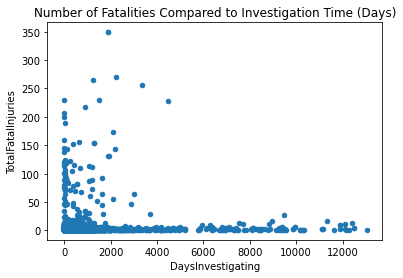

In [122]:
# Number of fatalities compared to the time spent investigating the crash

import matplotlib.pyplot as plt
%matplotlib inline

aviation["DaysInvestigating"] = (aviation['PublicationDatetime'] - aviation['EventDatetime']) / np.timedelta64(1, 'D')

scatterplot = aviation[ (~(np.isnan(aviation['TotalFatalInjuries'].astype(float))))
                        & (~(aviation['TotalFatalInjuries'].astype(float) < 1))
                        & (~(np.isnan(aviation['DaysInvestigating'].astype(float))))]
scatter_title = "Number of Fatalities Compared to Investigation Time (Days)"
scatterplot.plot.scatter(x='DaysInvestigating', y='TotalFatalInjuries', title=scatter_title)

We can see that some investigations took a really long time to complete (12,000 days or 32 years for some of the incidents).  However, don't be fooled by the seemingly small size of the scatter plot.  There are a lot of accidents on our model.

Using the scatterplot above, let's form a machine learning model that can predict the number of fatalities based on the number of days that it took to investigate the crash.  We will be creating a linear regression model from the data in the above scatter plot. This webpage will give you a basic understanding of what a linear regression is supposed to do:
https://www.w3schools.com/python/python_ml_linear_regression.asp

If you want to learn more about the sklearn module, I invite you to follow this link:
https://scikit-learn.org/stable/user_guide.html

In [124]:
data = scatterplot
from sklearn import linear_model

#Given the amount of days investigating, we want to predict total fatalities
X=data["DaysInvestigating"].values[:,np.newaxis]
y=data["TotalFatalInjuries"].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print("Y Intercept: "+str(reg.intercept_))
print("\nSlope:       "+str(reg.coef_)) #slope


Y Intercept: 2.5545940993385527

Slope:       [0.00052742]


We now have a linear regression model of our data.  This model looks at the number of total fatal iunjuries and the number of days that the NTSB took to investigate.  This linear model can (hopefully) be used to make predictions about future NTSB data.  If we know the number of days that the NTSB has taken to investigate an accident, we can apply our linear regression to predict the number of fatalities that ocurred in that incursion.

In [125]:
# We are given the number of days investigating, and we ant to predict the total number of fatalities
y_pred = reg.predict(X_test)

#Compare actual values with the linear regression's estimate:
pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()}).head(10)



,Actual,Predicted
0,2.0,2.784548
1,1.0,3.112601
2,1.0,2.777164
3,3.0,2.755540
4,1.0,2.862078
5,2.0,2.875264
6,4.0,2.576218
7,1.0,2.685921
8,1.0,4.423759
9,1.0,2.756067


In the table above, we applied our testing data to our linear regression model.  The values in the table indicate the actual number of fatalities (based on the number of days it took to investigate).  Next to that column, we can see the value that our model predicted as the number of expected fatalities based on the duration of the iunvestigation.

Unfortunately, our model is not very accurate at predicting the number of fatalities based on the duration of the investigation.  This can be caused by several factors.  Looking at the scatterplot above, I would have to estimate that the number of days investigating might not have a correlation with the number of days it took to investigate.  It could also be the case that our model might benefit from a gradient decent or a polynomial regression analysis.  

If you would like to know more about how a machine learning and linear regression can be used in Python, I invite you to read the following:
https://www.geeksforgeeks.org/introduction-machine-learning-using-python/


Congratulations, You have finished creating a machine learning model of the data!  Let us discuss what we learned:

## Conclusions

This tutorial has shown you how to apply the data science pipeline to a dataset.  We saw how to collect data from an XML file and how to load it into a Pandas dataframe.  Then, we filled in missing values in the data.  Once that was complete, we visualized the data to get a better understanding of what it means.  We came to conclusions from these visual models.  Finally, we looked at a machine learning approach that can be used to predict future data.

Aircraft are fascinating, and the number and significance of each incursion is incredibly important.  NTSB data can be intimidating since it is such a large dataset.  Due to its size, I think the NTSB dataset is an excellent example to use in this tutorial.  I hope you enjoyed analyzing the NTSB data with me!